In [48]:
import pandas as pd

In [49]:
data_dir = "./data/"  # Define data path
food_crises = pd.read_csv(data_dir + "food_crises_cleaned.csv")  # Read data into DataFrame
article_summary = pd.read_csv(data_dir + "articles_summary_cleaned.csv")  # Read data into DataFrame
article_topics = pd.read_csv(data_dir + "articles_topics.csv")  # Read data into DataFrame
southsudan = pd.read_csv(data_dir + "all_africa_southsudan.csv")  # Read data into DataFrame

## Inspect food_crises

In [50]:
food_crises.head()  # Inspect data

,country,district_code,district,centx,centy,year_month,year,month,ipc,ha,...,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct,date
0,South Sudan,74,Bor,32.00486,6.465644,2007_01,2007,1,NaN,NaN,...,0.048880,0,0,0.561363,14008.33,7.961984,239344.0,11393.76,90.8503,2007-01-01
1,South Sudan,74,Bor,32.00486,6.465644,2007_02,2007,2,NaN,NaN,...,-0.457928,0,0,0.565693,14008.33,7.961984,239344.0,11393.76,90.8503,2007-02-01
2,South Sudan,74,Bor,32.00486,6.465644,2007_03,2007,3,NaN,NaN,...,-0.590175,0,0,0.592437,14008.33,7.961984,239344.0,11393.76,90.8503,2007-03-01
3,South Sudan,74,Bor,32.00486,6.465644,2007_04,2007,4,NaN,NaN,...,-1.845536,0,0,0.605352,14008.33,7.961984,239344.0,11393.76,90.8503,2007-04-01
4,South Sudan,74,Bor,32.00486,6.465644,2007_05,2007,5,NaN,NaN,...,-2.972735,0,0,0.618699,14008.33,7.961984,239344.0,11393.76,90.8503,2007-05-01


#### Applying cleaning given in predictions.ipynb

In [51]:
food_crises["date"] = pd.to_datetime(food_crises["year_month"], format="%Y_%m")  # Create date column
print(len(food_crises['district'].unique()))
food_crises.set_index(["date", "district"], inplace=True)  # Set index

78


In [52]:
food_crises.head() # Inspect data

,,country,district_code,centx,centy,year_month,year,month,ipc,ha,ndvi_mean,...,et_mean,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct
date,district,,,,,,,,,,,,,,,,,,,,,
2007-01-01,Bor,South Sudan,74,32.00486,6.465644,2007_01,2007,1,NaN,NaN,0.345851,...,0.671249,0.048880,0,0,0.561363,14008.33,7.961984,239344.0,11393.76,90.8503
2007-02-01,Bor,South Sudan,74,32.00486,6.465644,2007_02,2007,2,NaN,NaN,0.307600,...,0.129184,-0.457928,0,0,0.565693,14008.33,7.961984,239344.0,11393.76,90.8503
2007-03-01,Bor,South Sudan,74,32.00486,6.465644,2007_03,2007,3,NaN,NaN,0.278344,...,1.025460,-0.590175,0,0,0.592437,14008.33,7.961984,239344.0,11393.76,90.8503
2007-04-01,Bor,South Sudan,74,32.00486,6.465644,2007_04,2007,4,NaN,NaN,0.303320,...,3.846809,-1.845536,0,0,0.605352,14008.33,7.961984,239344.0,11393.76,90.8503
2007-05-01,Bor,South Sudan,74,32.00486,6.465644,2007_05,2007,5,NaN,NaN,0.413716,...,8.316274,-2.972735,0,0,0.618699,14008.33,7.961984,239344.0,11393.76,90.8503


In [53]:
food_crises.info()  # Inspect data types

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12324 entries, (Timestamp('2007-01-01 00:00:00'), 'Bor') to (Timestamp('2020-02-01 00:00:00'), 'Malakal')
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          12324 non-null  object 
 1   district_code    12324 non-null  int64  
 2   centx            12324 non-null  float64
 3   centy            12324 non-null  float64
 4   year_month       12324 non-null  object 
 5   year             12324 non-null  int64  
 6   month            12324 non-null  int64  
 7   ipc              3042 non-null   float64
 8   ha               2184 non-null   float64
 9   ndvi_mean        12324 non-null  float64
 10  ndvi_anom        12324 non-null  float64
 11  rain_mean        12324 non-null  float64
 12  rain_anom        12324 non-null  float64
 13  et_mean          12324 non-null  float64
 14  et_anom          12324 non-null  float64
 15  count_violence   12324 n

In [54]:
food_crises.describe()  # Inspect summary statistics

,district_code,centx,centy,year,month,ipc,ha,ndvi_mean,ndvi_anom,rain_mean,...,et_mean,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct
count,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,3042.000000,2184.000000,12324.000000,12324.000000,12324.000000,...,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000
mean,112.500000,30.552041,7.325735,2013.088608,6.436709,2.124918,0.125458,0.523914,102.777150,13.410813,...,13.922836,1.098669,0.543492,3.220789,13.890655,8109.035212,18.570146,147039.099666,33427.480308,80.555837
std,22.515723,2.063909,1.927968,3.799521,3.475977,0.896948,0.331313,0.173015,10.318057,12.174414,...,12.385726,3.419724,1.805653,37.882633,22.856678,8116.418198,14.369645,101589.906878,51714.447306,10.765849
min,74.000000,25.589390,3.737241,2007.000000,1.000000,1.000000,0.000000,0.181902,62.629560,0.000009,...,0.000273,-12.117810,0.000000,0.000000,0.459595,757.785500,0.032678,11352.160000,2787.772000,58.213330
25%,93.000000,29.130190,5.460567,2010.000000,3.000000,1.000000,0.000000,0.364779,97.583780,1.080134,...,1.587718,-0.632700,0.000000,0.000000,1.032964,4419.444000,6.354869,75670.000000,8429.583000,71.411760
50%,112.500000,30.584770,7.558543,2013.000000,6.000000,2.000000,0.000000,0.540265,101.956000,11.668220,...,11.349735,0.329042,0.000000,0.000000,2.108440,5881.470500,16.874360,123093.000000,15014.300000,85.683480
75%,132.000000,32.210300,8.930423,2016.000000,9.000000,3.000000,0.000000,0.675034,107.021850,23.610402,...,24.470100,3.122106,0.000000,0.000000,15.723220,9237.169000,28.638140,185184.900000,40366.550000,89.581820
max,151.000000,34.606250,11.362640,2020.000000,12.000000,5.000000,1.000000,0.852260,183.192100,49.343280,...,47.904190,17.113410,57.000000,2394.000000,139.999100,62296.580000,68.842480,984111.300000,341473.800000,93.459460


In [55]:
column_list = food_crises.columns.tolist()
print(column_list)

['country', 'district_code', 'centx', 'centy', 'year_month', 'year', 'month', 'ipc', 'ha', 'ndvi_mean', 'ndvi_anom', 'rain_mean', 'rain_anom', 'et_mean', 'et_anom', 'count_violence', 'sum_fatalities', 'food_price_idx', 'area', 'cropland_pct', 'pop', 'ruggedness_mean', 'pasture_pct']


C:\Users\30693\Desktop\DC3\JBG060-DC3-Group-25\dc3venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\30693\Desktop\DC3\JBG060-DC3-Group-25\dc3venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


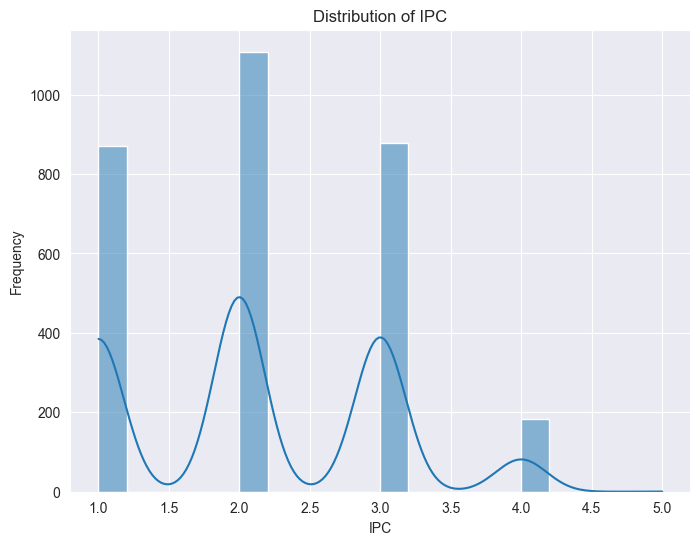

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns

# Example histogram for 'ipc'
plt.figure(figsize=(8, 6))
sns.histplot(data=food_crises, x='ipc', bins=20, kde=True)
plt.xlabel('IPC')
plt.ylabel('Frequency')
plt.title('Distribution of IPC')
plt.show()


C:\Users\30693\Desktop\DC3\JBG060-DC3-Group-25\dc3venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\30693\Desktop\DC3\JBG060-DC3-Group-25\dc3venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\30693\Desktop\DC3\JBG060-DC3-Group-25\dc3venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


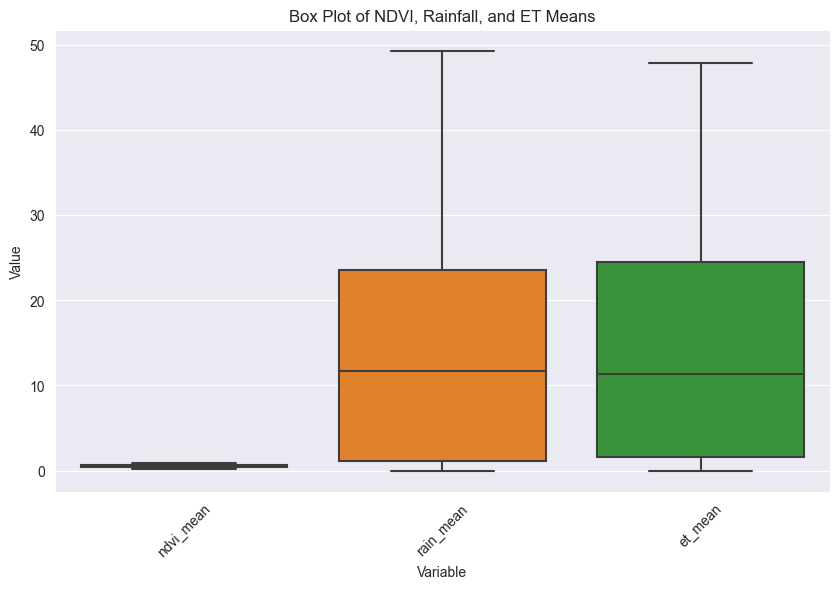

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=food_crises[['ndvi_mean', 'rain_mean', 'et_mean']])
plt.xticks(rotation=45)
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Box Plot of NDVI, Rainfall, and ET Means')
plt.show()


C:\Users\30693\Desktop\DC3\JBG060-DC3-Group-25\dc3venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\30693\Desktop\DC3\JBG060-DC3-Group-25\dc3venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\30693\Desktop\DC3\JBG060-DC3-Group-25\dc3venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\30693\Desktop\DC3\JBG060-DC3-Group-25\dc3venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

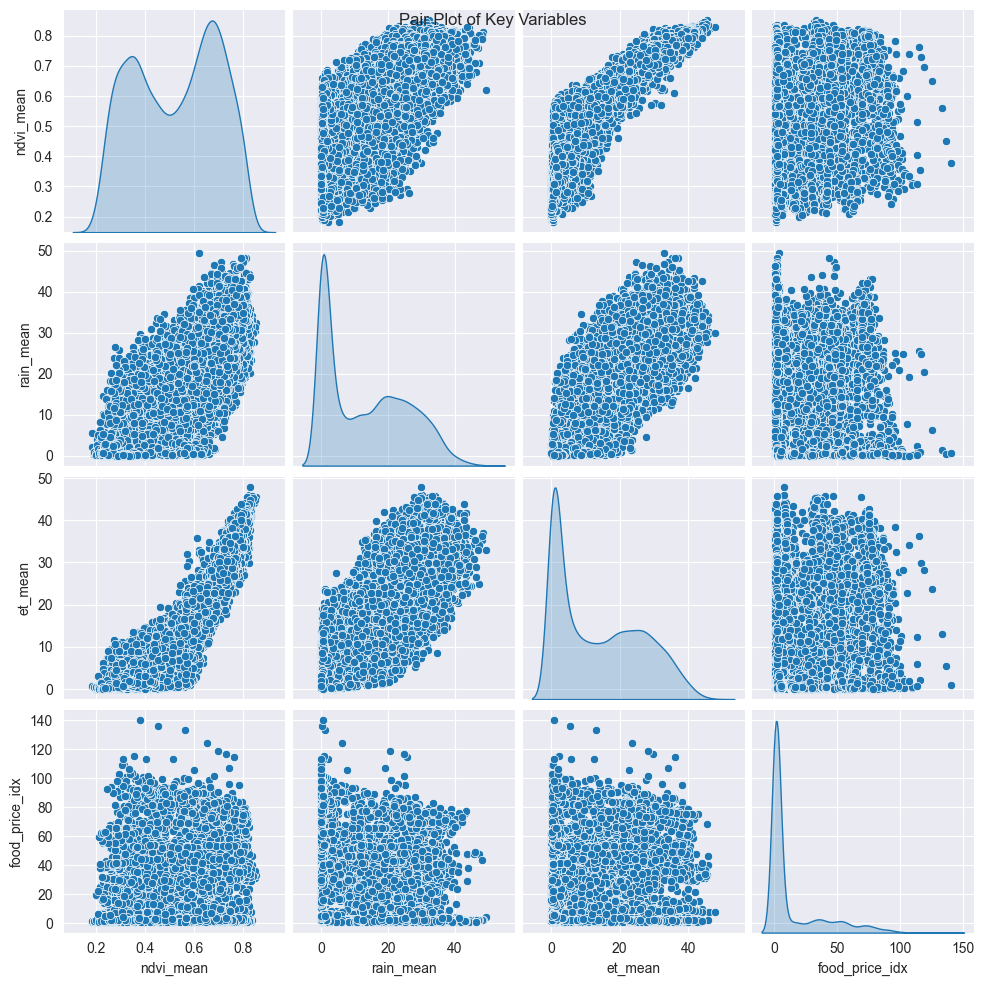

In [31]:
sns.pairplot(data=food_crises[['ndvi_mean', 'rain_mean', 'et_mean', 'food_price_idx']], diag_kind='kde')
plt.suptitle('Pair Plot of Key Variables')
plt.show()



In [32]:
missing_values = food_crises['district_code'].isnull().sum()
print(f"Number of missing values in 'district_code': {missing_values}")


Number of missing values in 'district_code': 0


In [33]:
district_code_counts = food_crises['district_code'].value_counts().reset_index()
district_code_counts.columns = ['District Code', 'Count']

print(district_code_counts)

    District Code  Count
0              74    158
1             123    158
2             130    158
3             129    158
4             128    158
..            ...    ...
73             99    158
74             98    158
75             97    158
76             96    158
77            151    158

[78 rows x 2 columns]


In [34]:
# Filter district codes with counts not equal to 158
not_equal_158 = district_code_counts[district_code_counts['Count'] != 158]

print("District codes that do NOT have a count of 158 are:")
print(not_equal_158)


District codes that do NOT have a count of 158 are:
Empty DataFrame
Columns: [District Code, Count]
Index: []


C:\Users\30693\Desktop\DC3\JBG060-DC3-Group-25\dc3venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\30693\Desktop\DC3\JBG060-DC3-Group-25\dc3venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


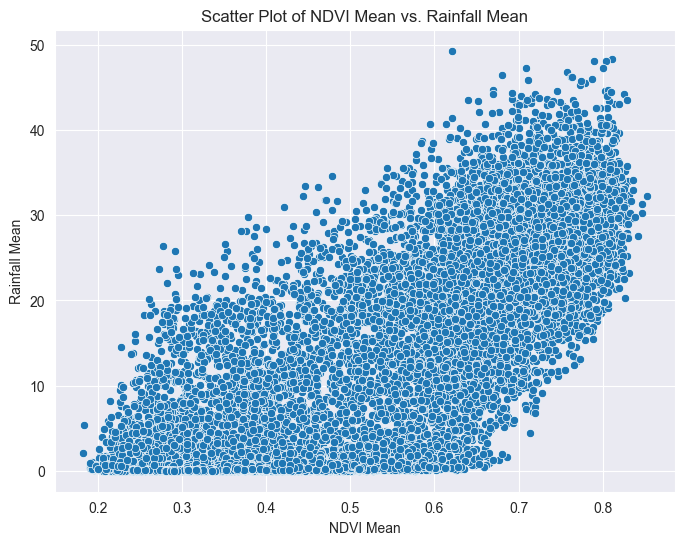

In [35]:
# Example scatter plot for 'ndvi_mean' vs. 'rain_mean'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=food_crises, x='ndvi_mean', y='rain_mean')
plt.xlabel('NDVI Mean')
plt.ylabel('Rainfall Mean')
plt.title('Scatter Plot of NDVI Mean vs. Rainfall Mean')
plt.show()


## Checking for null values and replacing them

In [36]:
# Count null values in each column
null_counts = food_crises.isnull().sum()

# Create a list of column names and their corresponding null counts
column_null_counts = [(column, count) for column, count in null_counts.items()]

# Display the list of column names and null counts
print(column_null_counts)

[('country', 0), ('district_code', 0), ('centx', 0), ('centy', 0), ('year_month', 0), ('year', 0), ('month', 0), ('ipc', 9282), ('ha', 10140), ('ndvi_mean', 0), ('ndvi_anom', 0), ('rain_mean', 0), ('rain_anom', 0), ('et_mean', 0), ('et_anom', 0), ('count_violence', 0), ('sum_fatalities', 0), ('food_price_idx', 0), ('area', 0), ('cropland_pct', 0), ('pop', 0), ('ruggedness_mean', 0), ('pasture_pct', 0)]


In [37]:
import pandas as pd

# Assuming you have already loaded your CSV into a DataFrame named 'food_crises'
# If not, you can load it like this:
# food_crises = pd.read_csv('your_csv_file.csv')

# Count missing (null) values in each column
null_counts = food_crises.isnull().sum()

# Count non-missing values in each column
non_null_counts = food_crises.count()

# Create a DataFrame to display both counts side by side
missing_non_missing_counts = pd.DataFrame({'Missing Values': null_counts, 'Non-Missing Values': non_null_counts})

# Display the counts of missing and non-missing values for each column
print(missing_non_missing_counts)


                 Missing Values  Non-Missing Values
country                       0               12324
district_code                 0               12324
centx                         0               12324
centy                         0               12324
year_month                    0               12324
year                          0               12324
month                         0               12324
ipc                        9282                3042
ha                        10140                2184
ndvi_mean                     0               12324
ndvi_anom                     0               12324
rain_mean                     0               12324
rain_anom                     0               12324
et_mean                       0               12324
et_anom                       0               12324
count_violence                0               12324
sum_fatalities                0               12324
food_price_idx                0               12324
area        

## Groyping by district code

In [47]:
sum = 0
date = '2009_4'
this_month = food_crises[food_crises['year_month'] == date]
this_month

,,country,district_code,centx,centy,year_month,year,month,ipc,ha,ndvi_mean,...,et_mean,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct
date,district,,,,,,,,,,,,,,,,,,,,,


In [60]:
import pandas as pd

# Convert district_code to string to avoid KeyError with numeric values
food_crises['district_code'] = food_crises['district_code'].astype(str)

# Group by 'district_code'
grouped_data = food_crises.groupby('district_code')

# Create separate DataFrames for each district_code
district_dataframes = {}

for district_code, group_df in grouped_data:
    # Store the DataFrame with district_code as the key
    district_dataframes[district_code] = group_df.copy()

# Now, you can access each DataFrame by its district_code
# For example, to access the DataFrame for district_code '74':
df_for_74 = district_dataframes['74']


In [61]:
df_for_74.head()

,,country,district_code,centx,centy,year_month,year,month,ipc,ha,ndvi_mean,...,et_mean,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct
date,district,,,,,,,,,,,,,,,,,,,,,
2007-01-01,Bor,South Sudan,74,32.00486,6.465644,2007_01,2007,1,NaN,NaN,0.345851,...,0.671249,0.048880,0,0,0.561363,14008.33,7.961984,239344.0,11393.76,90.8503
2007-02-01,Bor,South Sudan,74,32.00486,6.465644,2007_02,2007,2,NaN,NaN,0.307600,...,0.129184,-0.457928,0,0,0.565693,14008.33,7.961984,239344.0,11393.76,90.8503
2007-03-01,Bor,South Sudan,74,32.00486,6.465644,2007_03,2007,3,NaN,NaN,0.278344,...,1.025460,-0.590175,0,0,0.592437,14008.33,7.961984,239344.0,11393.76,90.8503
2007-04-01,Bor,South Sudan,74,32.00486,6.465644,2007_04,2007,4,NaN,NaN,0.303320,...,3.846809,-1.845536,0,0,0.605352,14008.33,7.961984,239344.0,11393.76,90.8503
2007-05-01,Bor,South Sudan,74,32.00486,6.465644,2007_05,2007,5,NaN,NaN,0.413716,...,8.316274,-2.972735,0,0,0.618699,14008.33,7.961984,239344.0,11393.76,90.8503


In [62]:
df_for_74.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 158 entries, (Timestamp('2007-01-01 00:00:00'), 'Bor') to (Timestamp('2020-02-01 00:00:00'), 'Bor')
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          158 non-null    object 
 1   district_code    158 non-null    object 
 2   centx            158 non-null    float64
 3   centy            158 non-null    float64
 4   year_month       158 non-null    object 
 5   year             158 non-null    int64  
 6   month            158 non-null    int64  
 7   ipc              39 non-null     float64
 8   ha               28 non-null     float64
 9   ndvi_mean        158 non-null    float64
 10  ndvi_anom        158 non-null    float64
 11  rain_mean        158 non-null    float64
 12  rain_anom        158 non-null    float64
 13  et_mean          158 non-null    float64
 14  et_anom          158 non-null    float64
 15  count_violence   158 non-null 

In [63]:
import pandas as pd

# Assuming you already have the 'district_dataframes' dictionary from the previous code

# Replace NaN values in 'ipc' column based on the described condition
for district_code, df in district_dataframes.items():
    # Identify consecutive NaN values
    is_nan = df['ipc'].isna()
    consecutive_nans = is_nan.groupby((~is_nan).cumsum()).cumsum()

    # Replace NaN values with the next non-NaN value if there are 2-3 consecutive NaNs before it
    df['ipc'] = df.apply(lambda row: row['ipc'] if pd.notna(row['ipc']) else row['ipc'] if consecutive_nans[row.name] in [2, 3] else None, axis=1)
    df['ipc'] = df['ipc'].fillna(method='bfill', limit=3)

# Now, district_dataframes dictionary contains DataFrames with NaN values in 'ipc' filled according to the specified condition


C:\Users\30693\AppData\Local\Temp\ipykernel_5256\435984275.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ipc'] = df['ipc'].fillna(method='bfill', limit=3)
C:\Users\30693\AppData\Local\Temp\ipykernel_5256\435984275.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ipc'] = df['ipc'].fillna(method='bfill', limit=3)
C:\Users\30693\AppData\Local\Temp\ipykernel_5256\435984275.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ipc'] = df['ipc'].fillna(method='bfill', limit=3)
C:\Users\30693\AppData\Local\Temp\ipykernel_5256\435984275.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ipc'] = df['ipc'].fillna(metho

In [66]:

# Print the first 50 rows of each DataFrame
for district_code, df in district_dataframes.items():
    print(f"DataFrame for district_code '{district_code}':")
    print(df.head(30))
    print("\n" + "="*40 + "\n")


DataFrame for district_code '100':
                         country district_code     centx     centy year_month  \
date       district                                                             
2007-01-01 Nagero    South Sudan           100  27.73822  6.471325    2007_01   
2007-02-01 Nagero    South Sudan           100  27.73822  6.471325    2007_02   
2007-03-01 Nagero    South Sudan           100  27.73822  6.471325    2007_03   
2007-04-01 Nagero    South Sudan           100  27.73822  6.471325    2007_04   
2007-05-01 Nagero    South Sudan           100  27.73822  6.471325    2007_05   
2007-06-01 Nagero    South Sudan           100  27.73822  6.471325    2007_06   
2007-07-01 Nagero    South Sudan           100  27.73822  6.471325    2007_07   
2007-08-01 Nagero    South Sudan           100  27.73822  6.471325    2007_08   
2007-09-01 Nagero    South Sudan           100  27.73822  6.471325    2007_09   
2007-10-01 Nagero    South Sudan           100  27.73822  6.471325    2007

# Dropping NULL values

# Getting rid of outliers

# Grouping data on a quarterly basis
